## Importando as bibliotecas

In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

## Análise Exploratória Futebol Internacional

Este dataset consiste no resultado de 43170 partidas internacionais do futebol masculino, desde a primeira partida oficial em 1872 até 2022. As partidas variam desde eventos como a Copa do Mundo FIFA até a Copa do Mundo FIFI e amistosos entre seleções. Além disso a base de dados não inclui partidas dos jogos olímpicos ou partidas onde qualquer uma das seleções jogou com time reserva, ou seleção sub 23 ou contra clube de futebol.

O arquivo results.csv inclui as seguintes colunas:

* date - data da partida
* home_team - nome do time da casa
* away_team - nome do time visitante
* home_score - número de gols marcados pelo time da casa, incluindo acréscimos, sem incluir disputas de pênaltis
* away_score - número de gols marcados pelo time visitante, incluindo acréscimos, sem incluir disputas de pênaltis
* tournament - o nome do torneio
* city - o nome da cidade onde a partida foi disputada
* country -  o nome do país onde a partida foi disputada
* neutral - booleano indicando se a partida foi realizada em campo neutro

O arquivo shootouts.csv inclui as seguintes colunas:

* date - data da partida
* home_team - nome do time da casa
* away_team - nome do time visitante
* winner - o vencedor da disputa de pênaltis

Diante dessa base de dados questiona-se qual equipe tem o melhor desempenho histórico e na história recente.
Além disso há a curiosidade de saber qual a performance de uma determinada equipe numa dada competição.

## Carregando os dados

In [722]:
df_resultados = pd.read_csv("datasets/results.csv")
df_resultados_penaltis = pd.read_csv("datasets/shootouts.csv")

In [723]:
df_resultados.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [724]:
df_resultados.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False
43751,2022-06-14,South Korea,Egypt,4,1,Friendly,Seoul,South Korea,False


In [725]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [726]:
df_resultados_penaltis.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [727]:
df_resultados_penaltis.tail()

,date,home_team,away_team,winner
490,2022-03-25,Tajikistan,Uganda,Uganda
491,2022-03-29,Kazakhstan,Moldova,Kazakhstan
492,2022-03-29,Senegal,Egypt,Senegal
493,2022-06-13,Australia,Peru,Australia
494,2022-06-14,Chile,Ghana,Ghana


In [728]:
df_resultados_penaltis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       495 non-null    object
 1   home_team  495 non-null    object
 2   away_team  495 non-null    object
 3   winner     495 non-null    object
dtypes: object(4)
memory usage: 15.6+ KB


Após a verificação inicial do dataset é possível ver que ambos datasets não possuem valores faltantes, mas ambos possuem a coluna "date" como object, a seguir será convertida para datetime e as colunas serão renomeadas.

In [729]:
df_resultados["date"] = pd.to_datetime(df_resultados["date"])
df_resultados_penaltis["date"] = pd.to_datetime(df_resultados_penaltis["date"])

Renomeando as colunas:

In [730]:
colunas_df_resultados = [
    "Data",
    "Mandante",
    "Visitante",
    "Gols Mandante",
    "Gols Visitante",
    "Torneio", 
    "Cidade", 
    "País",
    "Neutro"
    ]

colunas_df_resultados_penaltis = [
    "Data",
    "Mandante",
    "Visitante",
    "Vencedor"
]

In [731]:
dict1 = {col:nova_col for col,nova_col in zip(df_resultados.columns,colunas_df_resultados)}
dict2 = {col:nova_col for col,nova_col in zip(df_resultados_penaltis.columns,colunas_df_resultados_penaltis)}

In [732]:
df_resultados = df_resultados.rename(columns= dict1)
df_resultados_penaltis = df_resultados_penaltis.rename(columns= dict2)

In [733]:
df_resultados.head()

,Data,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [734]:
df_resultados_penaltis.head()

,Data,Mandante,Visitante,Vencedor
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [735]:
df_resultados["Torneio"].unique()[:30]

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification'], dtype=object)

Ainda assim, falta a informação de qual o resultado da partida, logo define-se uma coluna para indicar o resultado da partida indicando o nome do vencedor ou se foi empate

In [736]:
# Utilizando compreensão de lista, mas poderia ser definida com uso de lista e if elif else aninhados
df_resultados["Resultado"] = [mandante if placar_m > placar_v else visitante if placar_m < placar_v else 'Empate'for placar_m, placar_v, mandante, visitante in zip(df_resultados["Gols Mandante"],df_resultados["Gols Visitante"],df_resultados["Mandante"],df_resultados["Visitante"])]

Criando colunas com ano, mês e dia do mês de cada partida

In [737]:
df_resultados["Ano"] = df_resultados["Data"].dt.year
df_resultados["Mês"] = df_resultados["Data"].dt.month
df_resultados["Dia"] = df_resultados["Data"].dt.day

In [738]:
df_resultados.groupby(["Resultado","Ano"])

In [739]:
df_resultados.loc[(df_resultados["Mandante"] == "England")|(df_resultados["Visitante"] == "England")]

,Data,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43414,2022-03-29,England,Ivory Coast,3,0,Friendly,London,England,False,England,2022,3,29
43531,2022-06-04,Hungary,England,1,0,UEFA Nations League,Budapest,Hungary,False,Hungary,2022,6,4
43589,2022-06-07,Germany,England,1,1,UEFA Nations League,Munich,Germany,False,Empate,2022,6,7
43676,2022-06-11,England,Italy,0,0,UEFA Nations League,Wolverhampton,England,False,Empate,2022,6,11


## Análise Exploratória

Observando apenas a série histórica de partidas, qual o país mais vitorioso em partidas regulares e em disputas de pênaltis?

In [740]:
df_resultados["Resultado"].value_counts().head()

Empate       10084
Brazil         649
England        594
Germany        572
Argentina      546
Name: Resultado, dtype: int64

In [741]:
df_resultados_penaltis["Vencedor"].value_counts().head()

Egypt           13
South Korea     13
Argentina       12
Zambia          12
South Africa    11
Name: Vencedor, dtype: int64

Em números absolutos, a seleção brasileira é a com maior número de vitórias em tempo normal, enquanto o Egito e a Coreia do Sul lideram com maior número de disputas de pênltis.

Para a execução das análises, se vê a necessidade de uma função para selecionar as partidas de um determinado país 

In [742]:
def df_resultados_pais(pais : str) -> pd.DataFrame:
    df_pais =  df_resultados.loc[(df_resultados["Mandante"] == pais)|(df_resultados["Visitante"] == pais)]
    df_pais_penaltis = df_resultados_penaltis.loc[(df_resultados_penaltis["Mandante"] == pais)|(df_resultados_penaltis["Visitante"] == pais)]
    return df_pais, df_pais_penaltis

### Utilizando a função para observar os jogos do Brasil:

In [743]:
df_brasil = df_resultados_pais("Brazil")[0]

In [744]:
df_brasil.head()

,Data,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
410,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,Argentina,1914,9,20
411,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,Brazil,1914,9,27
441,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,Empate,1916,7,8
442,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,Empate,1916,7,10
444,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,Uruguay,1916,7,12


Analisando com ajuda de um gráfico o desempenho da seleção brasileira em partidas regulares:

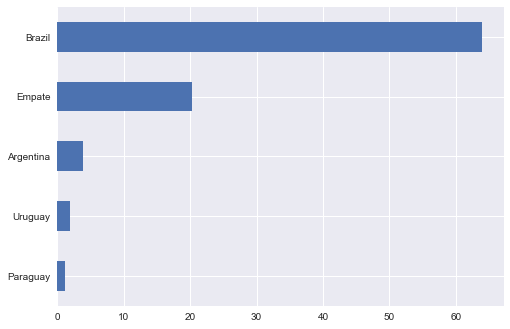

In [745]:
df_brasil["Resultado"].value_counts(normalize=True, ascending = True).mul(100).tail().plot.barh();

In [746]:
df_brasil["Resultado"].value_counts(normalize=True).mul(100).round(3).astype(str).head() + '%'

Brazil       64.004%
Empate       20.217%
Argentina     3.846%
Uruguay       1.972%
Paraguay      1.085%
Name: Resultado, dtype: object

In [747]:
df_brasil.shape

(1014, 13)

Logo, na série histórica, a seleção teve 64% de vitórias em 1014 partidas disputadas.

### Utilizando a função para observar os jogos da Inglaterra, segunda no acumulado:

In [748]:
df_inglaterra = df_resultados_pais("England")[0]

In [749]:
df_inglaterra.head()

,Data,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,3,4


Analisando com ajuda de um gráfico o desempenho da seleção brasileira em partidas regulares:

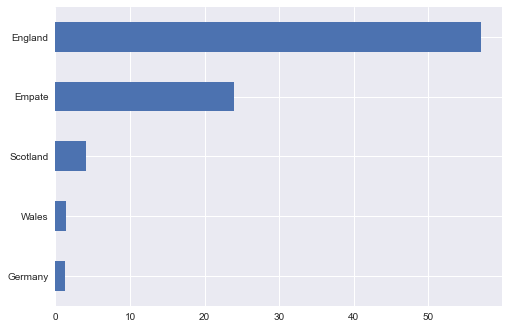

In [750]:
df_inglaterra["Resultado"].value_counts(normalize=True, ascending = True).mul(100).tail().plot.barh();

In [751]:
df_inglaterra["Resultado"].value_counts(normalize=True).mul(100).round(3).astype(str).head() + '%'

England     57.006%
Empate      23.896%
Scotland     4.031%
Wales         1.44%
Germany      1.248%
Name: Resultado, dtype: object

In [752]:
df_inglaterra.shape

(1042, 13)

Logo, na série histórica, a seleção inglesa teve 57% de vitórias em 1042 partidas disputadas!

Observando o dataset relativo a disputa de pênaltis, para as seleções do Egito e da Coreia do Sul.

In [753]:
df_coreia_sul, df_coreia_sul_penaltis = df_resultados_pais("South Korea")
df_egito, df_egito_penaltis = df_resultados_pais("Egypt")

In [754]:
df_egito_penaltis

,Data,Mandante,Visitante,Vencedor
29,1980-03-19,Algeria,Egypt,Algeria
47,1983-04-22,Egypt,Congo,Egypt
56,1984-03-14,Egypt,Nigeria,Nigeria
71,1985-04-21,Madagascar,Egypt,Egypt
77,1986-03-21,Egypt,Cameroon,Egypt
85,1987-06-19,Australia,Egypt,Australia
91,1988-01-06,South Korea,Egypt,South Korea
98,1988-07-19,Egypt,Syria,Syria
131,1991-09-28,Egypt,Mali,Egypt
137,1992-09-15,Syria,Egypt,Egypt


In [755]:
df_coreia_sul_penaltis

,Data,Mandante,Visitante,Vencedor
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
7,1973-07-28,Myanmar,South Korea,Myanmar
16,1974-12-18,South Korea,Malaysia,South Korea
20,1976-12-22,South Korea,Malaysia,Malaysia
40,1982-05-17,Thailand,South Korea,Thailand
86,1987-06-21,South Korea,Australia,South Korea
91,1988-01-06,South Korea,Egypt,South Korea
104,1988-12-18,South Korea,Saudi Arabia,Saudi Arabia
119,1990-08-03,China PR,South Korea,South Korea


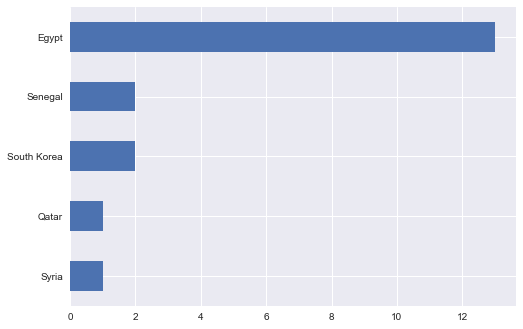

In [756]:
df_egito_penaltis["Vencedor"].value_counts(ascending = True).tail().plot.barh();

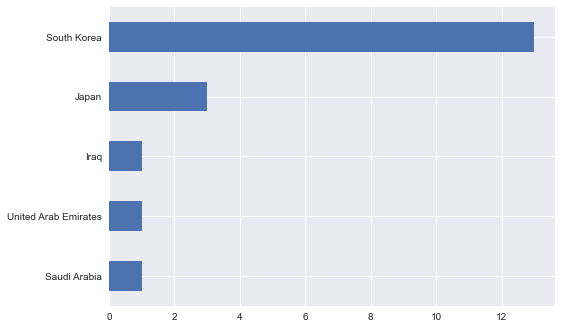

In [757]:
df_coreia_sul_penaltis["Vencedor"].value_counts(ascending = True).tail().plot.barh();

In [758]:
df_egito_penaltis.shape

(22, 4)

In [759]:
df_coreia_sul_penaltis.shape

(22, 4)

In [760]:
df_egito_penaltis["Vencedor"].value_counts(normalize=True).mul(100).round(2).astype(str).head() + '%'

Egypt          59.09%
South Korea     9.09%
Senegal         9.09%
Algeria         4.55%
Nigeria         4.55%
Name: Vencedor, dtype: object

In [761]:
df_coreia_sul_penaltis["Vencedor"].value_counts(normalize=True).mul(100).round(2).astype(str).head() + '%'

South Korea    59.09%
Japan          13.64%
Myanmar         4.55%
Malaysia        4.55%
Thailand        4.55%
Name: Vencedor, dtype: object

Curiosamente, tanto a seleção do Egito quanto a da Coreia do Sul, disputaram e ganharam o mesmo número de disputas de pênaltis.

A fim de observar qual a competição de cada disputa, será necessário fazer um left join com os resultados das partidas.

In [762]:
df_coreia_sul_penaltis_comp = pd.merge(df_coreia_sul_penaltis, df_coreia_sul[["Data","Torneio"]], on='Data', how='left')
df_egito_penaltis_comp = pd.merge(df_egito_penaltis, df_egito[["Data","Torneio"]], on='Data', how='left')

In [763]:
df_coreia_sul_penaltis_comp

,Data,Mandante,Visitante,Vencedor,Torneio
0,1971-11-14,South Korea,Vietnam Republic,South Korea,King's Cup
1,1972-05-17,Thailand,South Korea,South Korea,AFC Asian Cup
2,1973-07-28,Myanmar,South Korea,Myanmar,Merdeka Tournament
3,1974-12-18,South Korea,Malaysia,South Korea,King's Cup
4,1976-12-22,South Korea,Malaysia,Malaysia,King's Cup
5,1982-05-17,Thailand,South Korea,Thailand,King's Cup
6,1987-06-21,South Korea,Australia,South Korea,Korea Cup
7,1988-01-06,South Korea,Egypt,South Korea,Friendly
8,1988-12-18,South Korea,Saudi Arabia,Saudi Arabia,AFC Asian Cup
9,1990-08-03,China PR,South Korea,South Korea,Dynasty Cup


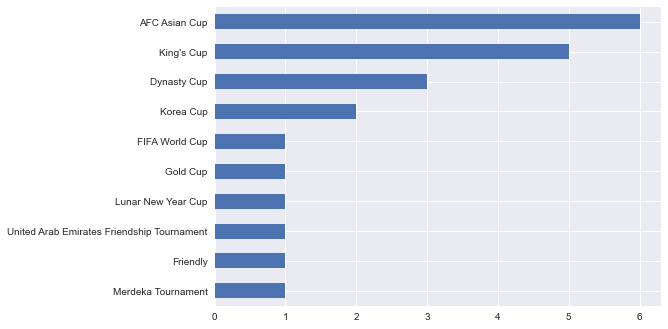

In [800]:
df_coreia_sul_penaltis_comp["Torneio"].value_counts(ascending = True).plot.barh();

In [765]:
df_egito_penaltis_comp

,Data,Mandante,Visitante,Vencedor,Torneio
0,1980-03-19,Algeria,Egypt,Algeria,African Cup of Nations
1,1983-04-22,Egypt,Congo,Egypt,African Cup of Nations qualification
2,1984-03-14,Egypt,Nigeria,Nigeria,African Cup of Nations
3,1985-04-21,Madagascar,Egypt,Egypt,FIFA World Cup qualification
4,1986-03-21,Egypt,Cameroon,Egypt,African Cup of Nations
5,1987-06-19,Australia,Egypt,Australia,Korea Cup
6,1988-01-06,South Korea,Egypt,South Korea,Friendly
7,1988-07-19,Egypt,Syria,Syria,Arab Cup
8,1991-09-28,Egypt,Mali,Egypt,Friendly
9,1992-09-15,Syria,Egypt,Egypt,Arab Cup


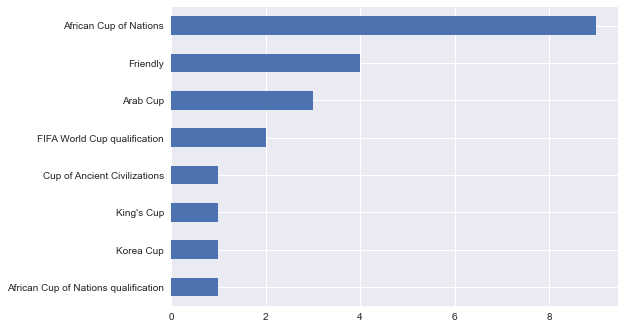

In [802]:
df_egito_penaltis_comp["Torneio"].value_counts(ascending = True).plot.barh();

Com a informação das competições vemos que elas ocorreram em torneios diferentes para Egito e Coreia do Sul, a seleção egípcia teve suas disputas ocorrendo, majoritariamente, em edições da Copa Africana de Nações, enquanto a seleção sul-coreana teve mais disputas na Copa da AFC e a King's Cup, campeonato internacional organizado na Tailândia pela Associação Tailandesa de Futebol. Logo, as disputas não são as seleções que mais decidiram em Copas do Mundo da FIFA, mas são 

### Análise dos resultados da seleção brasileira ao longo do tempo

#### Realizando filtragem e verificando a performance entre o tetra e o pentacampeonato do Brasil.

In [767]:
df_tetra_penta = df_brasil.loc[(df_brasil["Ano"] < 2003)&(df_brasil["Ano"] > 1994)]
df_tetra_penta["Resultado"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Brazil           69.5%
Empate           16.3%
Mexico            2.1%
Argentina         2.1%
Norway            1.4%
France            1.4%
Paraguay          1.4%
United States     0.7%
South Korea       0.7%
Chile             0.7%
Ecuador           0.7%
Australia         0.7%
Uruguay           0.7%
Honduras          0.7%
Bolivia           0.7%
Name: Resultado, dtype: object

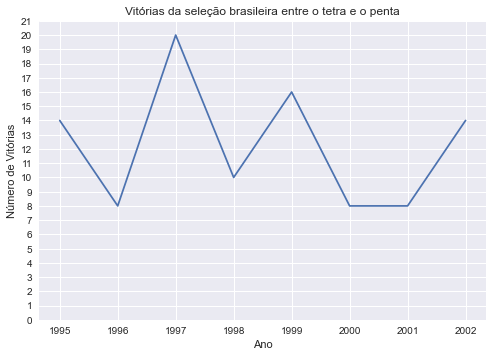

In [768]:
df_tetra_penta[["Ano","Resultado"]].groupby(["Ano","Resultado"]).size().unstack(fill_value = 0)['Brazil'].plot()
plt.ylabel("Número de Vitórias")
plt.yticks(np.arange(0, 22, 1))
plt.title("Vitórias da seleção brasileira entre o tetra e o penta");

#### Verificando como o desempenho histórico

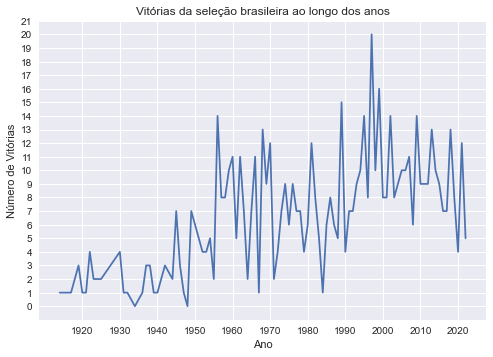

In [769]:
df_brasil[["Ano","Resultado"]].groupby(["Ano","Resultado"]).size().unstack(fill_value = 0)['Brazil'].plot()
plt.ylabel("Número de Vitórias")
plt.yticks(np.arange(0, 22, 1))
plt.xticks(np.arange(df_brasil["Ano"].min() + 6, df_brasil["Ano"].max() + 6, 10)) 
plt.title("Vitórias da seleção brasileira ao longo dos anos");

Observando a linhas, vemos que o pico de vitórias da Seleção aconteceu no final da década de 90, que quando comparado com as últimas duas décadas, parece indicar um declínio da seleção no cenário internacional. 

Contudo, existem outras explicações possíveis, por exemplo a diminuição do número total de jogos ou a realização de mais amistosos na década de 90, que poderiam explicar esse valor, logo seria mais útil verificar o desempenho percentual ao longo dos anos.

In [770]:

df_percetual = df_brasil[["Resultado","Ano"]].groupby("Ano", as_index=False).value_counts(normalize=True)
df_percetual

,Ano,Resultado,proportion
0,1914,Brazil,0.500000
1,1914,Argentina,0.500000
2,1916,Empate,0.500000
3,1916,Uruguay,0.250000
4,1916,Brazil,0.250000
...,...,...,...
312,2021,Brazil,0.750000
313,2021,Empate,0.187500
314,2021,Argentina,0.062500
315,2022,Brazil,0.833333


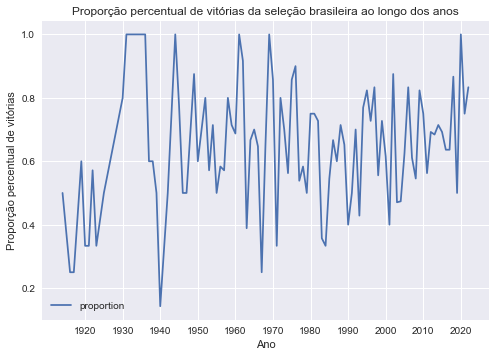

In [771]:
df_percetual[["Ano","proportion"]].loc[df_percetual["Resultado"] == "Brazil"].plot(x = "Ano", y = "proportion")
plt.ylabel("Proporção percentual de vitórias")
plt.xticks(np.arange(df_percetual["Ano"].min() + 6, df_percetual["Ano"].max() + 6, 10)) 
plt.title("Proporção percentual de vitórias da seleção brasileira ao longo dos anos");

Agora analisando o desempenho percertual vemos que o desempenho não era tão dominante no cenário durante as década de 90 e 2000, e constata-se que o desempenho da seleção vem aumentando desde então. Mas ainda há a faceta de quanto e quais campeonatos foram disputados para resultar nessa melhora. O que será explorado de forma mais  na próxima seção.

### Explorando os resultados por competição

In [772]:
df_resultados["Torneio"].value_counts().head(10)

Friendly                                17362
FIFA World Cup qualification             7775
UEFA Euro qualification                  2593
African Cup of Nations qualification     1773
FIFA World Cup                            900
Copa América                              841
AFC Asian Cup qualification               764
African Cup of Nations                    742
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: Torneio, dtype: int64

Como as partidas se concentram em amistosos e qualificatórias da Copa do Mundo FIFA, serão gerados dataframes relativos a essas competições. 

E como a Copa do Mundo FIFA é o evento com maior número e geralmente associado como o campeonato mundial de futebol internacional, também será gerado um dataframe para a competição.

Criando uma função que filtre um dataframe por competição:

In [773]:
def gera_df_competicao(competicao : str, df_filtrar : pd.DataFrame) -> pd.DataFrame:
    return df_filtrar.loc[(df_filtrar["Torneio"] == competicao)]

Gerando datasets relativos à Copa do Mundo, as eliminatórias da Copa do Mundo e amistosos utilizando a função gera_df_competicao.

In [774]:
df_amistosos = gera_df_competicao("Friendly",df_resultados)
df_copas = gera_df_competicao("FIFA World Cup",df_resultados)
df_eliminatorias = gera_df_competicao("FIFA World Cup qualification",df_resultados)

In [793]:
df_amistosos.tail()

,Data,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
43686,2022-06-11,Ecuador,Cape Verde,1,0,Friendly,Fort Lauderdale,United States,True,Ecuador,2022,6,11
43687,2022-06-11,Uruguay,Panama,5,0,Friendly,Montevideo,Uruguay,False,Uruguay,2022,6,11
43703,2022-06-12,Iran,Algeria,1,2,Friendly,Doha,Qatar,True,Algeria,2022,6,12
43717,2022-06-13,Albania,Estonia,0,0,Friendly,Tirana,Albania,False,Empate,2022,6,13
43751,2022-06-14,South Korea,Egypt,4,1,Friendly,Seoul,South Korea,False,South Korea,2022,6,14


In [794]:
df_eliminatorias.tail()

,Data,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
43444,2022-03-30,Solomon Islands,New Zealand,0,5,FIFA World Cup qualification,Doha,Qatar,True,New Zealand,2022,3,30
43464,2022-06-01,Scotland,Ukraine,1,3,FIFA World Cup qualification,Glasgow,Scotland,False,Ukraine,2022,6,1
43538,2022-06-05,Wales,Ukraine,1,0,FIFA World Cup qualification,Cardiff,Wales,False,Wales,2022,6,5
43704,2022-06-13,Australia,Peru,0,0,FIFA World Cup qualification,Al Rayyan,Qatar,True,Empate,2022,6,13
43718,2022-06-14,Costa Rica,New Zealand,1,0,FIFA World Cup qualification,Al Rayyan,Qatar,True,Costa Rica,2022,6,14


In [795]:
df_copas.tail()

,Data,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
40133,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,Empate,2018,7,7
40134,2018-07-10,France,Belgium,1,0,FIFA World Cup,Saint Petersburg,Russia,True,France,2018,7,10
40135,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,Croatia,2018,7,11
40136,2018-07-14,Belgium,England,2,0,FIFA World Cup,Saint Petersburg,Russia,True,Belgium,2018,7,14
40137,2018-07-15,France,Croatia,4,2,FIFA World Cup,Moscow,Russia,True,France,2018,7,15


In [790]:
df_amistosos["Resultado"].value_counts().head(10)

Empate         4353
Germany         306
Brazil          292
Hungary         266
Sweden          247
England         231
France          218
Poland          216
Mexico          213
Netherlands     195
Name: Resultado, dtype: int64

In [783]:
df_eliminatorias["Resultado"].value_counts().head(10)

Empate         1644
Mexico           98
South Korea      93
Australia        92
Iran             89
Netherlands      89
Spain            87
Sweden           86
Argentina        86
England          84
Name: Resultado, dtype: int64

In [792]:
df_copas["Resultado"].value_counts().head(10)

Empate         199
Brazil          73
Germany         67
Italy           45
Argentina       43
France          34
Spain           30
England         29
Netherlands     27
Uruguay         24
Name: Resultado, dtype: int64

Assim, vê-se que a seleção brasileira, aparece em primeiro lugar em números de vitórias apenas nas partidas da Copa do Mundo, em primeiro nas eliminatórias fica o México e nos amistosos fica a seleção alemã.

#### Analisando o desempenho recente do Brasil

In [781]:
lista_competicoes = df_resultados["Torneio"].unique()

In [796]:
def df_resultados_pais_competicao(pais : str, competicao: str) -> pd.DataFrame:
    df_pais =  df_resultados_pais(pais)[0]
    if competicao not in lista_competicoes:
        print("Competição não definida, verifique a variável lista_competicoes!")
        return df_pais
    df_final = gera_df_competicao(competicao, df_pais)
    return df_final


In [797]:
df_resultados_pais_competicao('Brazil', 'FIFA World Cup').tail()

,Data,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
40083,2018-06-17,Brazil,Switzerland,1,1,FIFA World Cup,Rostov-on-Don,Russia,True,Empate,2018,6,17
40096,2018-06-22,Brazil,Costa Rica,2,0,FIFA World Cup,Saint Petersburg,Russia,True,Brazil,2018,6,22
40115,2018-06-27,Serbia,Brazil,0,2,FIFA World Cup,Moscow,Russia,True,Brazil,2018,6,27
40125,2018-07-02,Brazil,Mexico,2,0,FIFA World Cup,Samara,Russia,True,Brazil,2018,7,2
40131,2018-07-06,Brazil,Belgium,1,2,FIFA World Cup,Kazan,Russia,True,Belgium,2018,7,6


In [805]:
df_copas_recentes = gera_df_competicao('FIFA World Cup', df_resultados)
df_copas_recentes.loc[(df_resultados["Ano"] >= 2003)]["Resultado"].value_counts().head(15)

Empate         57
Germany        17
Netherlands    13
Argentina      13
France         13
Brazil         13
Spain          11
Belgium        10
Uruguay         9
England         7
Portugal        7
Mexico          6
Colombia        6
Switzerland     6
Italy           6
Name: Resultado, dtype: int64

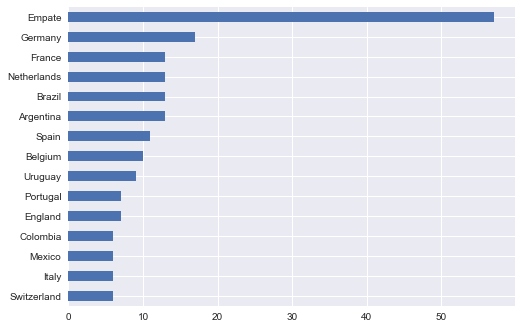

In [808]:
df_copas_recentes.loc[(df_resultados["Ano"] >= 2003)]["Resultado"].value_counts(ascending = True).tail(15).plot.barh();

Analisando apenas as vitórias, vemos que o Brasil na copa se mantém na segunda posição em número de vitórias desde o pentacampeonato em 2002, contudo como não foram feitas o mapeamento das vitórias em disputas de pênaltis o número final de vitórias pode variar.

Uma análise percentual e de confrontos diretos poderia elucidar mais qual o ambiente atual que precede a Copa do Mundo FIFA do Catar a ser disputada nesse ano e qual a seleção favorita, mas acredito que foge um pouco do foco do desafio de projeto.